In [1]:
# https://stackoverflow.com/questions/13538748/crop-black-edges-with-opencv
#https://stackoverflow.com/questions/54888690/i-want-to-remove-a-blurred-black-border-from-an-image-with-opencv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm.notebook import tqdm

In [2]:
movie_range = [[1, 140], [156, 311], [327, 538], [554, 740], 
               [773, 911], [927, 1094], [1124, 1319], [1335, 1651], 
               [1667, 1835], [1851, 1988], [2004, 2167], [2183, 2326]]

In [3]:
change_idx = [2,3,5,7,9]
#sens_list = [0.5, 0.5, 0.8, 0.8, 0.5, 0.8, 0.5, 0.8, ]

In [4]:
datah_all = []
dataw_all = []

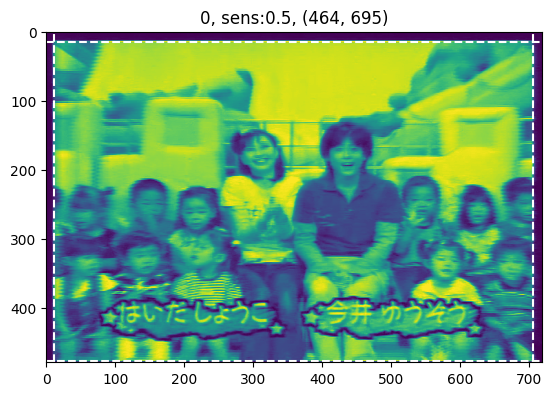

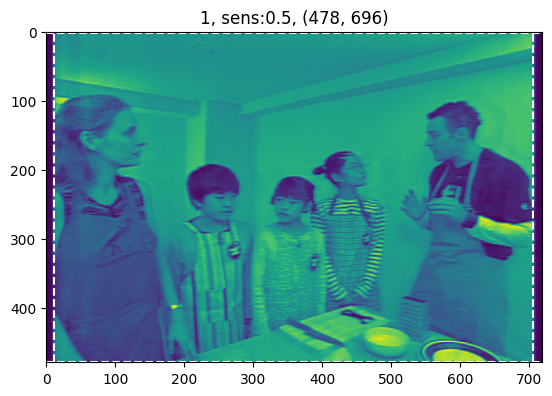

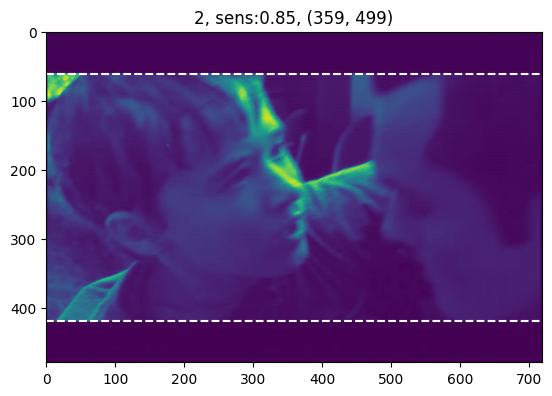

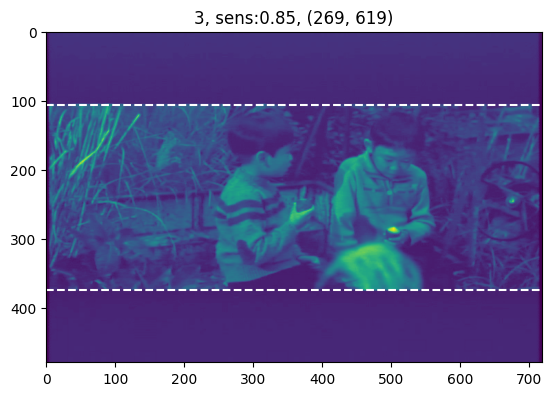

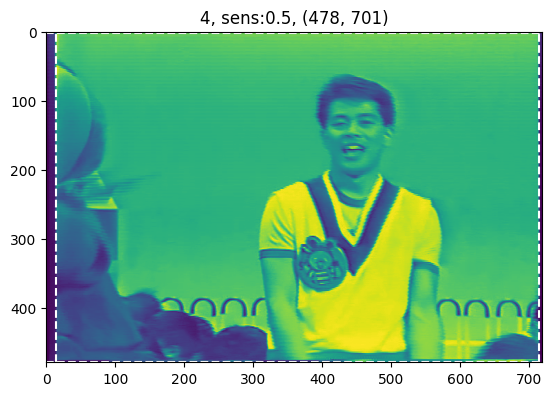

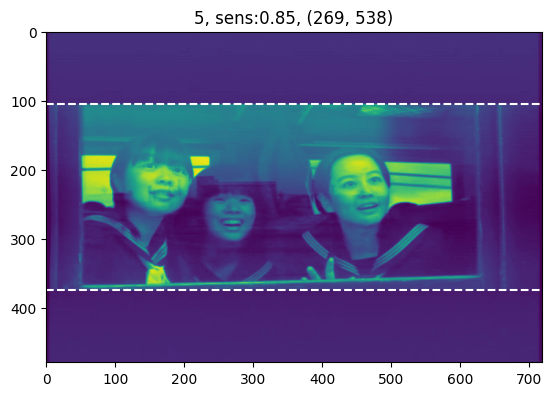

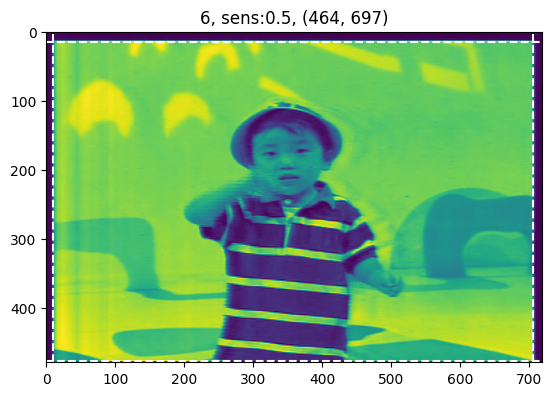

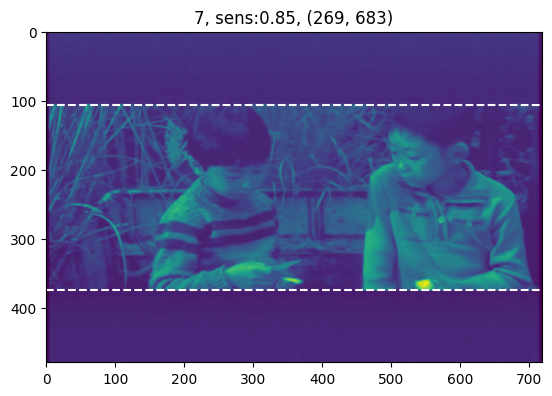

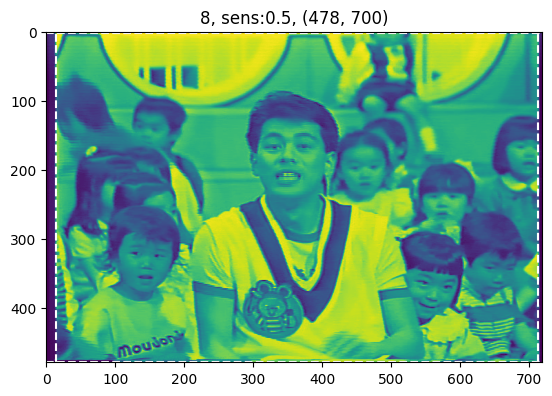

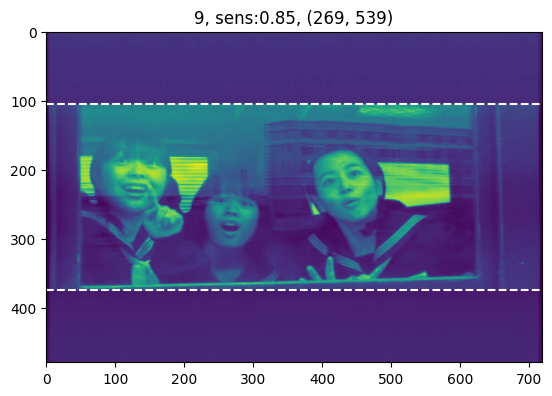

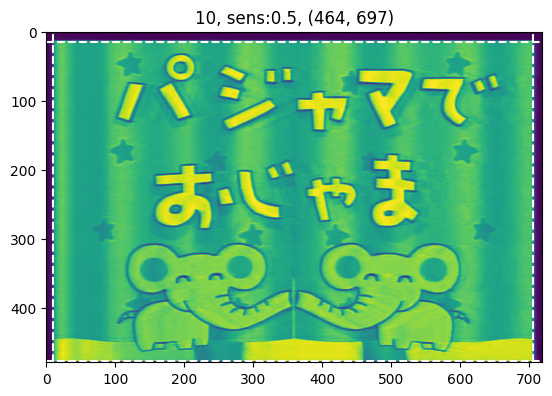

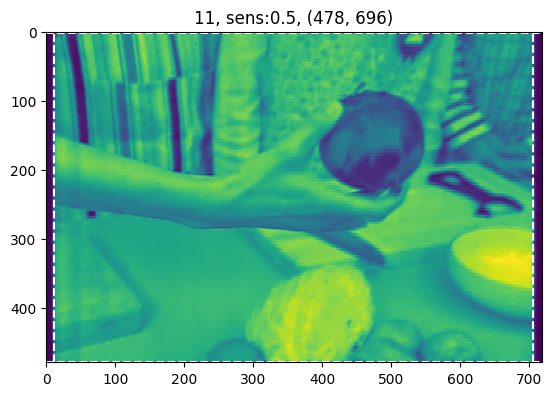

In [5]:
for movie_idx, ran in enumerate(movie_range):
    b, e = ran
    frame_idx = b

    img=cv2.imread("../video_stimuli/frames/frame{0:04d}.png".format(frame_idx),0).T
    w,h=img.shape
    if movie_idx in change_idx:
        sens = 0.85
    else:
        sens=0.5 # (0-1]
    meanofimg=np.mean(img)*sens
    dataw=[w,0]
    datah=[h,0]
    for i in range(w):
        if np.mean(img[i])>meanofimg:
            if i<dataw[0]:
                dataw[0]=i
            else:
                dataw[1]=i
    img=img.T
    meanofimg=np.mean(img)*sens
    for i in range(h):
        if np.mean(img[i])>meanofimg:
            if i<datah[0]:
                datah[0]=i
            else:
                datah[1]=i

    datah_all.append(datah)
    if movie_idx in change_idx:
        dataw_all.append([0, w])
    else: 
        dataw_all.append(dataw)
    
    plt.title(f"{movie_idx}, sens:{sens}, ({datah[1]-datah[0]}, {dataw[1]-dataw[0]})")
    plt.imshow(img)
    plt.axhline(datah[0], c="white", linestyle="dashed")
    plt.axhline(datah[1], c="white", linestyle="dashed")
    if movie_idx not in change_idx:
        plt.axvline(dataw[0], c="white", linestyle="dashed")
        plt.axvline(dataw[1], c="white", linestyle="dashed")
    plt.show()
    plt.close()

In [6]:
patch_size = 16

In [7]:
"""
for datah in datah_all:
    h = datah[1]-datah[0]
    rem = h%patch_size
    print(h, rem)

for dataw in dataw_all:
    w = dataw[1]-dataw[0]
    rem = w%patch_size
    print(w, rem)
"""

'\nfor datah in datah_all:\n    h = datah[1]-datah[0]\n    rem = h%patch_size\n    print(h, rem)\n\nfor dataw in dataw_all:\n    w = dataw[1]-dataw[0]\n    rem = w%patch_size\n    print(w, rem)\n'

Modify black cordar positions manually.

In [8]:
datah_all_modified = [[14, 478], [0, 480], [64, 416], [104, 376], [0, 480], [104, 376], 
                      [14, 478], [104, 376], [0, 480], [104, 376], [14, 478], [0, 480]]
dataw_all_modified = [[15, 703], [15, 703], [8, 712], [8, 712], [12, 716], [8, 712], 
                      [6, 710], [8, 712], [12, 716], [8, 712], [6, 710], [6, 710]]

In [9]:
for datah in datah_all_modified:
    h = datah[1]-datah[0]
    rem = h%patch_size
    print(h, rem)

for dataw in dataw_all_modified:
    w = dataw[1]-dataw[0]
    rem = w%patch_size
    print(w, rem)

464 0
480 0
352 0
272 0
480 0
272 0
464 0
272 0
480 0
272 0
464 0
480 0
688 0
688 0
704 0
704 0
704 0
704 0
704 0
704 0
704 0
704 0
704 0
704 0


In [10]:
dataw_all

[[11, 706],
 [11, 707],
 [0, 720],
 [0, 720],
 [14, 715],
 [0, 720],
 [10, 707],
 [0, 720],
 [14, 714],
 [0, 720],
 [10, 707],
 [11, 707]]

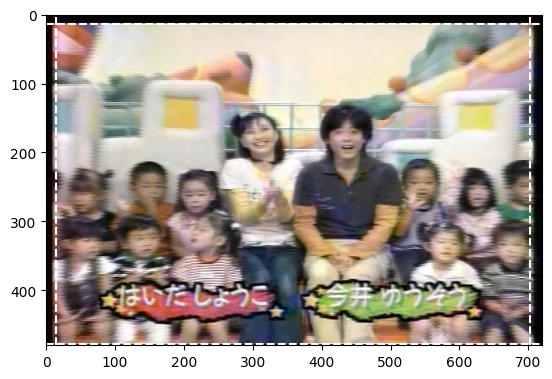

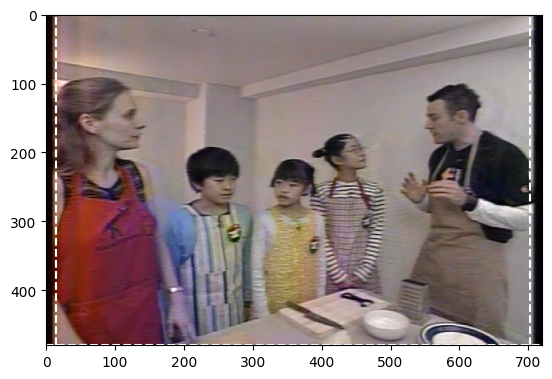

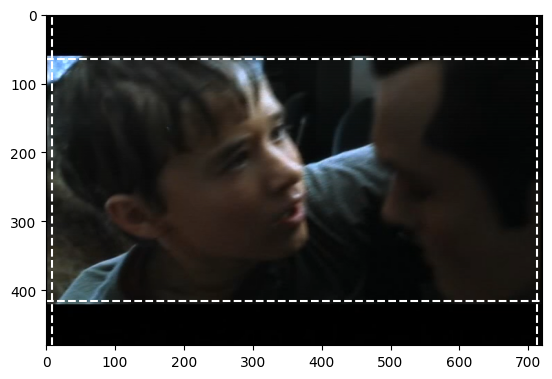

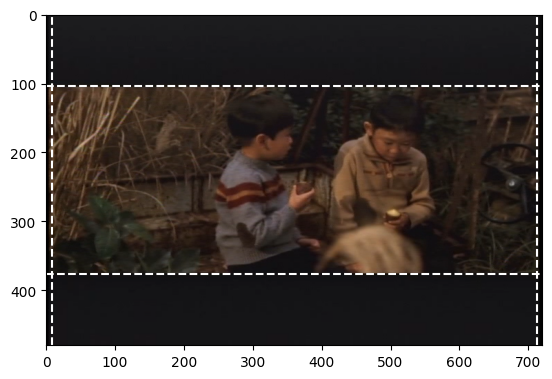

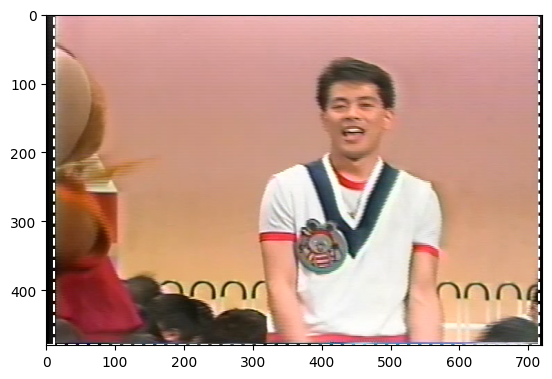

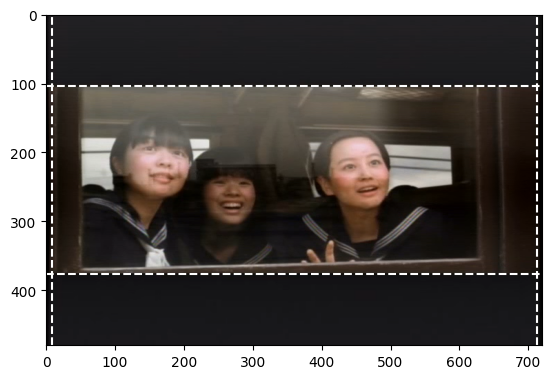

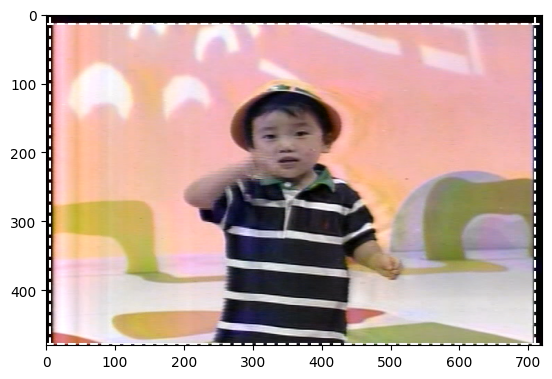

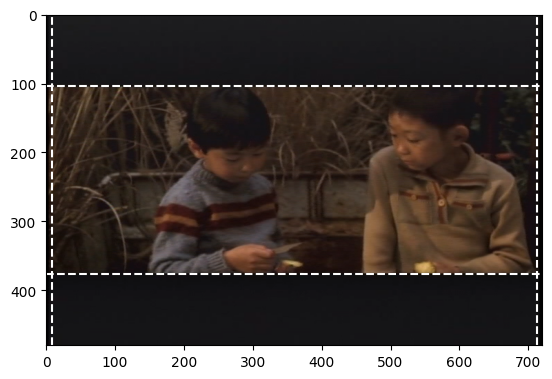

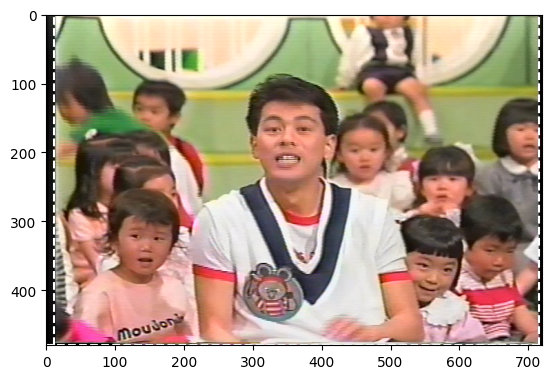

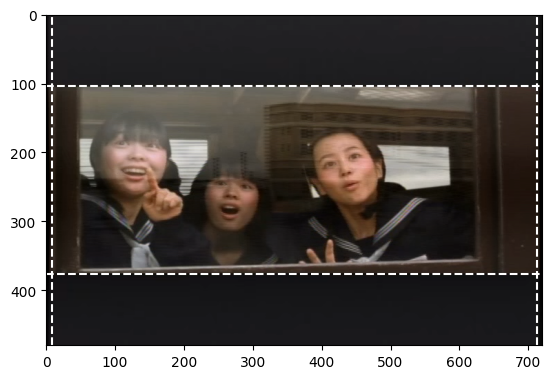

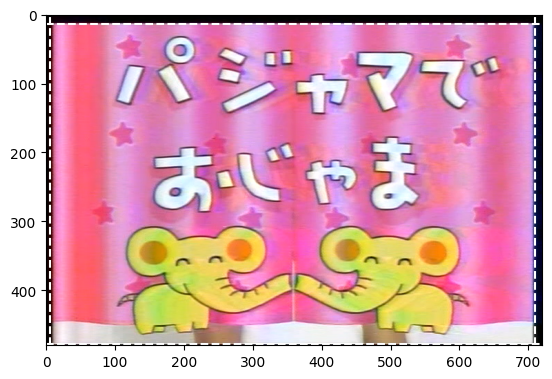

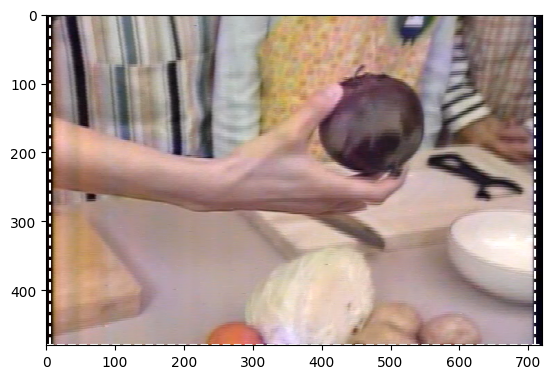

In [11]:
for movie_idx, ran in enumerate(movie_range):
    b, e = ran
    frame_idx = b

    img=cv2.imread("../video_stimuli/frames/frame{0:04d}.png".format(frame_idx))[:, :, ::-1]
    datah = datah_all_modified[movie_idx]
    dataw = dataw_all_modified[movie_idx]
    #plt.title(f"{movie_idx}, sens:{sens}, ({datah[1]-datah[0]}, {dataw[1]-dataw[0]})")
    plt.imshow(img)
    plt.axhline(datah[0], c="white", linestyle="dashed")
    plt.axhline(datah[1], c="white", linestyle="dashed")
    plt.axvline(dataw[0], c="white", linestyle="dashed")
    plt.axvline(dataw[1], c="white", linestyle="dashed")
    plt.xlim(0, 720)
    plt.ylim(480, 0)
    plt.show()
    plt.close()

Remove black border

In [12]:
##num_frames = 2327

In [13]:
for movie_idx, ran in enumerate(movie_range):
    b, e = ran
    for frame_idx in tqdm(range(b, e+1)):
        #print(frame_idx)
        datah = datah_all_modified[movie_idx]
        dataw = dataw_all_modified[movie_idx]
        img = cv2.imread("../video_stimuli/frames/frame{0:04d}.png".format(frame_idx))
        img_crop = img[datah[0]:datah[1],dataw[0]:dataw[1]]
        cv2.imwrite("../video_stimuli/frames_cropped/frame{0:04d}.png".format(frame_idx), img_crop)

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/317 [00:00<?, ?it/s]

  0%|          | 0/169 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

In [15]:
np.savez_compressed("../video_stimuli/border_info.npz", 
                    crop_range=movie_range,
                    datah=datah_all_modified,
                    dataw=dataw_all_modified)